# ccClub: Introduction to Machine Learning
---
## Lab 01: Introduction to Scikit-Learn

## Overview

- Input Data to Scikit-Learn
- Data Pre-processing with Scikit-Learn
- Feature Engineering with Scikit-Learn
- Split Data with Scikit-Learn
- Scikit-Learn Estimator API

# Part 1: Input Data to Scikit-Learn

The easiest way to understand how data work within Scikit-Learn is in terms of tables of data.

## Tables of Data

A basic table is a two-dimensional grid of data (like a spread sheet).

- Each row represents an **observation** or **sample**.
- Each column represents a **feature** or **attribute** or **variable**.
- Each entry of the table represents a single **value**.
- The number of rows is the total number of our samples in the dataset, which we refer to as `n_samples`.
- The number of columns is the total number of our features in the dataset, which we refer to as `n_features`.

![R for Data Science](img/tidy-1.png)

### Features Matrix

In sklearn, we usually store our table of data in a 2-dimensional NumPy array (matrix) or a Pandas DataFrame, called **features matrix**. We usually name this features matrix `X`. In general, this features matrix is 2-dimensional with shape `[n_sample, n_features]`. 

### Target Array

Target array is the labels or values that we want to predict. By convention, we usually call it `y`. It can contain continuous numerical values, or discrete classes/ labels. The target array is usually one-dimensional, with lenght `n_sample`.

Scikit-Learn also handles multiple targe values but we focus on the case of a one-dimensional target array here.

![Illustration of features matrix and target array](img/features_target.png)

## Example: Iris Dataset

For example, let's use the famous [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to illustrate.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Table as Pandas DataFrame

Here, we load the Iris data directly form `seaborn`, a popular visulization package. The first four columns are features and the last column is the our target. To input data into sklearn, we will need to separate our data into features matrix and target array.

In [3]:
import seaborn as sns
sns.set()

# load iris dataset from seaborn 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualize the data

Often, we will visualize our data to better understand it. Here, it seems like using `petal_length` and `petal_width` is a good start.

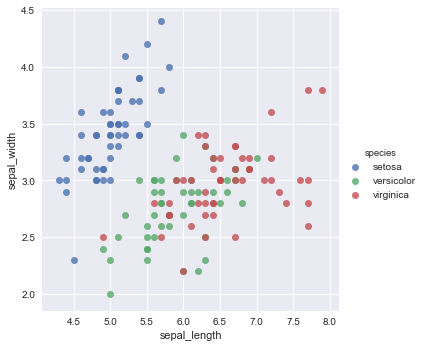

In [4]:
sns.lmplot(x='sepal_length', y='sepal_width', hue='species', data=iris, fit_reg=False);

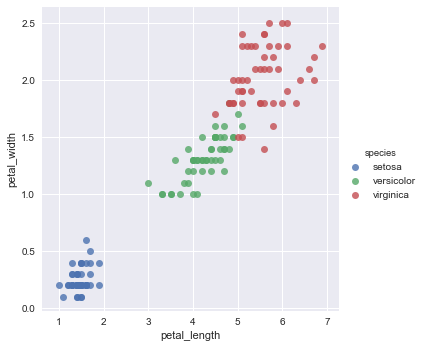

In [5]:
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=iris, fit_reg=False);

### Toy Datasets from Scikit-Learn

Scikit-learn provides some small datasets for us to experiment with. We can load the toy data from `sklearn.datasets`. The dataset generation functions `load_iris()` return a tuple (X, y) consisting of a `[n_samples, n_features]` numpy array X (features matrix) and an array of length `n_samples` containing the targets y (target array).

**Other toy datasets**

| Scikit-learn function     | Data Type
| ------------------------- | -------------------------------------------------------------
| `load_boston([return_X_y])` | Load and return the boston house-prices dataset (regression).
| `load_iris([return_X_y])`	| Load and return the iris dataset (classification).
| `load_diabetes([return_X_y])` | Load and return the diabetes dataset (regression).
| `load_digits([n_class, return_X_y])` | Load and return the digits dataset (classification).
| `load_linnerud([return_X_y])` | Load and return the linnerud dataset (multivariate regression).
| `load_wine([return_X_y])` | Load and return the wine dataset (classification).
| `load_breast_cancer([return_X_y])` | Load and return the breast cancer wisconsin dataset (classification).


### Table as NumPy array

Here, we load the iris data from sklearn. Noted that features matrix is a 2-dimensional matrix but the target array is a 1-dimensional array.

In [6]:
# load iris dataset from sklearn
from sklearn.datasets import load_iris

features, target = load_iris(return_X_y=True)

print('shape of features matrix:', features.shape)
print('length of target array:', target.shape)

shape of features matrix: (150, 4)
length of target array: (150,)


In [7]:
print('features matrix\n', features[:10], '\n')
print('target array\n', target[:10])

features matrix
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]] 

target array
 [0 0 0 0 0 0 0 0 0 0]


### Convert DataFrame or Series to NumPy array

In general, we will first load the data with Pandas to explore and manipulate the data first. After we are have our data ready, we will need to convert our Pandas DataFrame into NumPy array to work with sklearn library.

To covert Pandas DataFrame or Series into NumPy array, simple use `.values`.

In [8]:
# select features and target
features = iris.drop('species', axis=1)  # dataframe
target = iris['species']                 # series

display(features.head(), target.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [22]:
# convert to NumPy array
X = features.values
y = target.values

print('features matrix:\n', X[:5], '\n')
print('target array:\n', y[:5])

features matrix:
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]] 

target array:
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# Part 2: Data Pre-processing & Feature Engineering

Very often, our raw data may not be suitable for building a model. We may encounter skewed data, outliers, missing data, etc. The `sklearn.preprocessing` package provides several common functions for us to transform our raw data into representative features. 

## Scaling Data: Standardization

Many algorithms, which we will disucss later in the course, assume that all features are centered around $0$ and have unit variance for all features. If a feature in the data have a much higher or smaller variance than others, it might dominate the model or be totally ignored. This makes the model unable to learn correctly as expected.

A common way to handle this problem is using standardization. It will transform your data to have $0$ mean and unit variance for all features by the formula below. We first subtract the mean from each feature then divide the values (mean is already subtracted) of each feature by its standard deviation.

$$
x_{new} = \frac{x - \mu}{\sigma}
$$

### `scale` function

To perform standardiztion, we use the function `scale` from `scikit-learn.preprocessing` package.

Standardization is just one way to re-scale data. scikit-learn also provides other scaling functions, you can find more information in the [documentation](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).

In [23]:
from sklearn import preprocessing

print('original\n', X[:5])  # display features matrix from Iris data

X_scaled = preprocessing.scale(X)
print('\nstandardized\n', X_scaled[:5]) # display sacled data

original
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]

standardized
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [35]:
# suppress scientific notation
np.set_printoptions(suppress=True)

# standardized data has zero mean and unit variance for all features
print('mean:', X_scaled.mean(axis=0))
print('\nvariance:', X_scaled.std(axis=0))

mean: [-0. -0. -0. -0.]

variance: [ 1.  1.  1.  1.]


## Imputation of Missing Data

Sometimes, we will encounter missing data, either encoded as blanks, NaNs or other placeholder values. scikit-learn assumes that all values have menning. We can dsicard the entire rows and/or columns with missing values. However, we may lose data that may be useful. A common strategy to deal with missing data is to impute the missing values, i.e. replace the missing values.

**Imputation means inferring the missing values from the known part of the data.** Some common simple choices to impute the missing value include using mean, moedian, or the mode. We can also use more sophisticated methods such as matrix completion or fitting another model to predict missing values. The sophisticated approaches are more application-specific, so we won't discuss them here.

### Check `NaN`

If you want to check whether there are any missing value (encoded as `NaN`) in your data, you can use `.any` and `.isnan` methods from `numpy`.

In [59]:
# check NaN
missing_data = np.array([[0, np.nan, 2], 
                         [3, 4,      5], 
                         [6, 7,      np.nan]])

print(np.isnan(missing_data))          # check NaN for each value
print(np.any(np.isnan(missing_data)))  # check if there is any NaN

[[False  True False]
 [False False False]
 [False False  True]]
True


### `Imputer` class

In scikit-learn, the `Imputer` class provides some basic ways to impute the missing data. We can specifiy how do we want to impute the missing values as a parameters. The following demonstrates how to replace missing values, encoded as `np.nan`, using the mean value of the columns (axis 0) that contain the missing values.

In [61]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) # create imputer
imp.fit(missing_data)                                        # fit data (i.e. calculate mean)
X_impute = imp.transform(missing_data)                       # transform (i.e. impute) our data

print(X_impute)

[[ 0.   5.5  2. ]
 [ 3.   4.   5. ]
 [ 6.   7.   3.5]]


## Transform Categorical Features: One-hot Encoding

One common type of data is categorical data. Categorical data is non-numeric and the data does not imply any order.

In [ ]:
data = np.array([[]])

In [69]:
from sklearn.datasets import load_boston
X_1, y_1 = load_boston(return_X_y=True)

## Polynomial Features & Interaction

In [ ]:
# encoding categorical variables
# non-linear transform

# Part 3: Split Train/ Validation/ Test Set

In [ ]:
# train-test split

# Part 4: Scikit-Learn Estimator API

In [ ]:
# linear regression fit

# Text Feature Extraction